![](https://i.imgur.com/qkg2E2D.png)

# UnSupervised Learning Methods

## Exercise 002 - Part IV

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 19/08/2023 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/UnSupervisedLearningMethods/2023_08/Exercise0002Part004.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp

# Machine Learning
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering

# Computer Vision

# Statistics

# Miscellaneous
import os
import math
from platform import python_version
import random
import time
import urllib.request

# Typing
from typing import Callable, List, Tuple, Union

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [3]:
# Constants

DATA_FILE_URL   = r'https://drive.google.com/uc?export=download&confirm=9iBg&id=11YqtdWwZSNE-0KxWAf1ZPINi9-ar56Na'
DATA_FILE_NAME  = r'ClusteringData.npy'

TOTAL_RUN_TIME = 15 #<! Don't touch it!

## Guidelines

 - Fill the full names and ID's of the team members in the `Team Members` section.
 - Answer all questions / tasks within the Jupyter Notebook.
 - Use MarkDown + MathJaX + Code to answer.
 - Verify the rendering on VS Code.
 - Submission in groups (Single submission per group).
 - You may and _should_ use the forums for questions.
 - Don't use `pip install` on the submitted notebook!  
   If you need a package that is not imported make it clear by a comment.
 - Good Luck!

<font color='red'>Total run time must be **less than `TOTAL_RUN_TIME` seconds**</font>.

In [4]:
# Run Time
print(f'The total run time must not exceed: {TOTAL_RUN_TIME} [Sec]')
startTime = time.time()

The total run time must not exceed: 15 [Sec]


* <font color='brown'>(**#**)</font> The `Import Packages` section above imports most needed tools to apply the work. Please use it.
* <font color='brown'>(**#**)</font> You may replace the suggested functions to use with functions from other packages.
* <font color='brown'>(**#**)</font> Whatever not said explicitly to implement maybe used by a 3rd party packages.

## Team Members

- `<Ilan><Schaedel><011708005>`.
- `<Barak><Ben Menachem><312527229>`.
- `<Rotem><Weissman><203958103>`

In [5]:
# Students Packages to Import
# If you need a package not listed above, use this cell



## Generate / Load Data

In [6]:
# Download Data
# This section downloads data from the given URL if needed.

if not os.path.exists(DATA_FILE_NAME):
    urllib.request.urlretrieve(DATA_FILE_URL, DATA_FILE_NAME)

In [7]:
# Generate / Load Data

numSamples  = 1000
mA          =  np.array([[0.6, -0.6], [-0.4, 0.8]])

mX1 = datasets.make_circles(n_samples = numSamples, noise = 0.02)[0]
mX2 = datasets.make_moons(n_samples = numSamples, noise = 0.05)[0]
mX3 = datasets.make_blobs(n_samples = numSamples, random_state = 170)[0] @ mA
mX4 = datasets.make_blobs(n_samples = numSamples, random_state = 170, cluster_std = [0.8, 2, 0.4])[0] 
mX5 = np.load(DATA_FILE_NAME)

lDataSet = [mX1, mX2, mX3, mX4, mX5]
numDataSets = len(lDataSet)


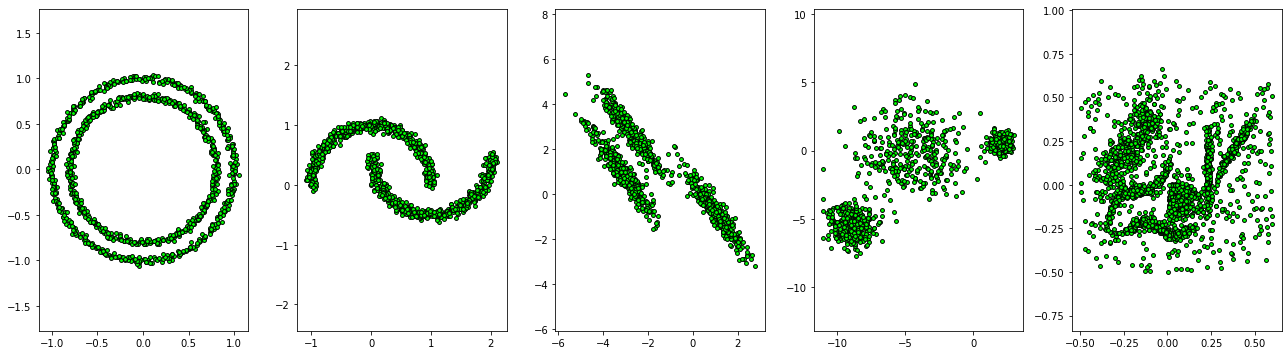

In [8]:
# Plot Data
hF, hAs = plt.subplots(nrows = 1, ncols = numDataSets, figsize = (18, 5))
hAs = hAs.flat

for ii, hA in enumerate(hAs):
    mX = lDataSet[ii]
    hA.scatter(mX[:, 0], mX[:, 1], c = 'lime', s = 15, edgecolor = 'k')
    hA.axis('equal')
    
plt.tight_layout()
plt.show()

## 8. Clustering by Density based Spatial Clustering of Applications with Noise (DBSCAN)

### 8.1. DBSCAN Algorithm

In this section we'll implement the DBSCAN algorithm:

1. Implement an auxiliary function to compute the connected components (`GetConnectedComponents()`).  
   You may choose any implementation strategy (`DFS` / `BFS`, ect...).
2. Implement the function `DBSCAN()`.  
   The function should label noise points as `-1`.

* <font color='brown'>(**#**)</font> Implementation should be efficient (Memory and operations).



In [9]:
#===========================Fill This===========================#
def GetConnectedComponents(mG: np.ndarray) -> np.ndarray:
    '''
    Extract the connected components of a graph.
    Args:
        mG          - Graph matrix.
    Output:
        vL          - Label per component.
    Remarks:
        - This is a !!BFS / DFS!! implementation.
    '''

    # number of vertices:
    V = mG.shape[0]

    # DFS traversal algorithm:
    def DFS(v, visited, components):
        '''
        DFS algotrihm
        Args:
        v           - current vertex index
        visited     - list of vertices, True if visited, False if not
        components  - list of vertices in current components
        Output:
        no output, the function effects the input args.
        '''
        visited[v] = True
        components.append(v)
        for i in range(V):
            if mG[v][i] and not visited[i]:
                DFS(i, visited, components)
    #===========================================================#
    
    # initiate visited list and labels
    visited = [False] * V
    vL = np.zeros(V, dtype=int)
    label = 0

    # go over all vertices and assign to labels
    for v in range(V):
        if not visited[v]:
            components = []
            DFS(v, visited, components)
            label += 1
            for vertex in components:
                vL[vertex] = label

    return vL

#===============================================================#

In [53]:
#===========================Fill This===========================#
def DBSCAN(mX: np.ndarray, Z: int, r: float) -> np.ndarray:
    '''
    DBSCAN Algorithm.
    Args:
        mX  - Input data with shape N x d.
        Z   - Number of points required to be a core point.
        r   - Neighborhood radius.
    Output:
        vL  - The labels (-1, 0, 1, .., K - 1) per sample with shape (N, ).
    Remarks:
        - Clusters will have the labels {0, 1, ..., K - 1}.
        - Noise samples will have the label `-1`.
    '''

    # Pre
    V = mX.shape[0]
    distances = sp.spatial.distance.cdist(mX, mX)

    # Step 1: Find core points
    core_points = []
    for v in range(V):
        neighbors = np.where(distances[v] < r)[0]
        if len(neighbors) >= Z:
            core_points.append(v)

    # Step 2: Build the graph
    mG = np.zeros((V,V), dtype=int)
    for i in range(V):
        for j in range(V):
            if i==j:
                pass
            if distances[i][j] < r:
                mG[i][j] = 1

    # Step 3: Find connected components
    vL = GetConnectedComponents(mG)

    # Step 4: Assign boundary points
    for v in range(V):
        distance_to_cores = distances[v, core_points]
        nearest_core = core_points[np.argmin(distance_to_cores)]
        if distances[v, nearest_core] < r:
            vL[v] = vL[nearest_core]
        else:
            vL[v] = -1

    return vL

#===============================================================#

### 8.2. Clustering the Data Set

In this section we'll use the implementation of the DSCAN algorithm.
The tasks are:

1. Use the data set `mX4`.
2. Tweak the parameters until you have 3 clusters.
3. Display results.

In [82]:
#===========================Fill This===========================#
# 1. Set parameters.
Z = 6
r = 0.7

# 2. Apply the algorithm.

vL = DBSCAN(mX4, Z, r)
noise_points = mX4[vL == -1]
clustered_points = mX4[vL != -1]
clusters_num = len(set(vL)) - 1
noise_data_ratio = len(noise_points)/len(mX4)\




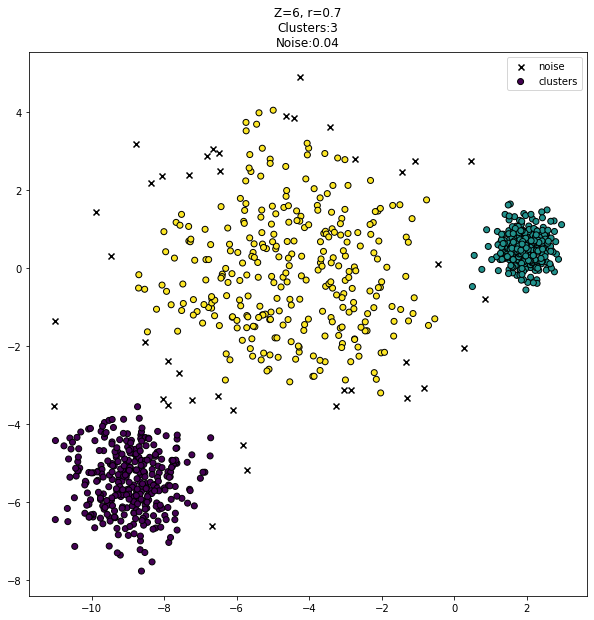

In [86]:
#===========================Fill This===========================#
# 1. Plot the clustered data.
# !! The noise samples should also be labeled.

fig, axes = plt.subplots(1,1, figsize=(10, 10))

axes.scatter(noise_points[:, 0], noise_points[:, 1], c='black', marker='x', label='noise')
axes.scatter(clustered_points[:, 0], clustered_points[:, 1], c=vL[vL != -1], marker='o', edgecolor='k', label='clusters')
axes.set_title(f'Z={Z}, r={r}\nClusters:{clusters_num}\nNoise:{noise_data_ratio:.2f}')
plt.legend()
plt.show()
#==============================================#

#===============================================================#

### 8.3. An Algorithm to Set the Parameters Automatically Given a Data Set

Can you think about an algorithm to automatically infer optimal parameters of the DBSCAN algorithm given a data set?   

1. Sketch the algorithm (Words / Diagram).
2. Implement and test on `mX4`.
3. Plot the results.

* <font color='brown'>(**#**)</font> Run time should be reasonable (Single number of seconds).
* <font color='brown'>(**#**)</font> Good answers might be given a bonus points of up to 4 points.

### 8.3. Solution

<font color='red'>??? Fill the answer here ???</font>

---

In [ ]:
#===========================Fill This===========================#
# Implement a function which gets a data set and output the `Z` and `r` parameters of `DBSCAN()`.

#===============================================================#


In [ ]:
#===========================Fill This===========================#
# Test your algorithm on `mX4` data set. Show results.

#===============================================================#

### 8.4. Test Methods on the Data Set

In this section we'll compare 4 methods on each data set.  
The 4th methods is `AgglomerativeClustering` which is imported from `SciKit Learn`.

1. Run each method on each data set.
2. Plot a grid of results (Using `plt.subplots()`): Each row is a different method, each column is a different data set.
3. Find a reasonable value for the hyper parameters per data set per method.

The final result is a grid of `4 x 5` scatter plots.

* <font color='brown'>(**#**)</font> You should use `CourseAuxFun.py` and import your self implemented functions from the module.

In [ ]:
#===========================Fill This===========================#
# Display the results of each method

#===============================================================#

In [ ]:
# Run Time
# Check Total Run Time.
# Don't change this!

endTime = time.time()

totalRunTime = endTime - startTime
print(f'Total Run Time: {totalRunTime} [Sec].')

if (totalRunTime > TOTAL_RUN_TIME):
    raise ValueError(f'You have exceeded the allowed run time as {totalRunTime} > {TOTAL_RUN_TIME}')